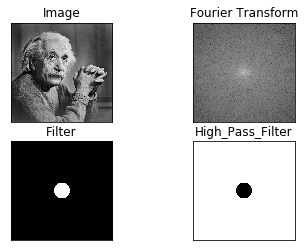

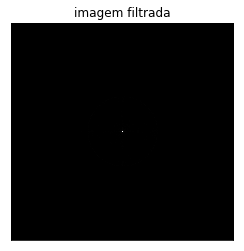

In [16]:
#ButH = (1+ (np.sqrt(2)-1)((D0/D)(2*n)))*-1         #funcao BUTTERWORTH passa alta
#ButL = (1+ (np.sqrt(2)-1)((D/D0)(2*n)))*-1         #funcao  BUTTERWORTH passa baixa
# posição dos pixels em forma circular
#D = np.sqrt((x-np.array(center)[0]) * 2 + (y-np.array(center)[1]) * 2)


import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('einstein.jpg', 0)
height, width = img.shape

plt.figure("Input")
plt.subplot(221),plt.imshow(img, cmap = 'gray')
plt.title('Image'), plt.xticks([]), plt.yticks([])

fft = np.log(np.abs(np.fft.fftshift(np.fft.fft2(img))))
plt.subplot(222),plt.imshow(fft, cmap = 'gray')
plt.title('Fourier Transform'), plt.xticks([]), plt.yticks([])

r = 50
h_Filter_Low_Pass = np.zeros(img.size, img.dtype).reshape(img.shape)
for icounter in range(1, height):
    for jcounter in range(1, width):
        if ((icounter - height/2)**2 + (jcounter - width/2)**2) < r**2:
            h_Filter_Low_Pass[icounter, jcounter] = 1
plt.subplot(223),plt.imshow((h_Filter_Low_Pass), cmap = 'gray')
plt.title('Filter'), plt.xticks([]), plt.yticks([])
            
plt.subplot(224),plt.imshow((h_Filter_Low_Pass-1), cmap = 'gray')
plt.title('High_Pass_Filter'), plt.xticks([]), plt.yticks([])

filter_fft = np.log(np.abs(np.fft.fftshift(np.fft.fft2(h_Filter_Low_Pass))))
#plt.subplot(224),plt.imshow(h_fft, cmap = 'gray')
#plt.title('Fourier Transform (Filter)'), plt.xticks([]), plt.yticks([])


plt.figure("Output")
g = fft * filter_fft
g_ifft = np.abs(np.fft.ifftshift(np.fft.ifft2(g)).real)
plt.subplot(),plt.imshow(g_ifft, cmap = 'gray')
plt.title('imagem filtrada'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
D0 = 50

ButH = (1+ (np.sqrt(2)-1)((D0/D)(2*n)))*-1         #funcao BUTTERWORTH passa alta
ButL = (1+ (np.sqrt(2)-1)((D/D0)(2*n)))*-1         #funcao  BUTTERWORTH passa baixa

#posição dos pixels em forma circular

D = np.sqrt((x-np.array(center)[0]) * 2 + (y-np.array(center)[1]) * 2)

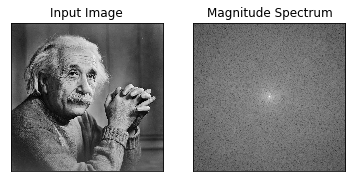

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('einstein.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()   

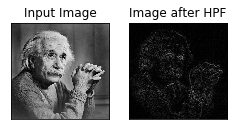

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('einstein.jpg',0)

# fft to convert the image to freq domain 
f = np.fft.fft2(img)

fshift = np.fft.fftshift(f)

rows, cols = img.shape
crow,ccol = rows/2 , cols/2

# mascara retangular 60x60
# High Pass Filter (HPF)
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0

# shift back (we shifted the center before)
f_ishift = np.fft.ifftshift(fshift)

# inverse fft to get the image back 
img_back = np.fft.ifft2(f_ishift)

img_back = np.abs(img_back)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])

plt.show()